In [5]:
import swagger_client
from swagger_client.rest import ApiException
from pprint import pprint
import requests

# Configure and create an API client
# using an API token
API_TOKEN = "000b74d58339656029f052a32d6f9e11fae8321f"
MLP_URL = "https://ml4dqm-playground.web.cern.ch"

configuration = swagger_client.Configuration()
configuration.host = MLP_URL
client = swagger_client.ApiClient(configuration)
client.set_default_header(header_name="Content-Type", header_value="application/json")
client.set_default_header(header_name="Authorization", header_value=f"Token {API_TOKEN}")

api_instance = swagger_client.ApiApi(client)

In [122]:
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
import pandas as pd

In [3]:
dir(api_instance)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'api_client',
 'create_lumisection',
 'create_lumisection_certification',
 'create_lumisection_certification_with_http_info',
 'create_lumisection_histogram1_d',
 'create_lumisection_histogram1_d_with_http_info',
 'create_lumisection_histogram2_d',
 'create_lumisection_histogram2_d_with_http_info',
 'create_lumisection_with_http_info',
 'create_prediction',
 'create_prediction_with_http_info',
 'create_run',
 'create_run_certification',
 'create_run_certification_with_http_info',
 'create_run_histogram',
 'create_run_histogram_with_http_info',
 'create_run_with_http_info',
 'create_strategy',
 'create_strategy_with_http_i

In [4]:
# Get by run number
run_num = 315267
lh1d = api_instance.list_lumisection_histogram1_ds(
    lumisection__run__run_number=run_num
) 
print(f"Got {len(lh1d.results)} results!\n")
pprint(lh1d)



Got 50 results!

{'count': None,
 'next': '/api/lumisection_histograms_1d/?lumisection__run__run_number=315267&page=2',
 'previous': None,
 'results': [{'data': [0.0,
                       0.0,
                       0.0,
                       1.0,
                       31.0,
                       103.0,
                       147.0,
                       132.0,
                       102.0,
                       79.0,
                       51.0,
                       39.0,
                       38.0,
                       22.0,
                       19.0,
                       22.0,
                       13.0,
                       16.0,
                       11.0,
                       9.0,
                       8.0,
                       12.0,
                       8.0,
                       12.0,
                       8.0,
                       5.0,
                       5.0,
                       2.0,
                       3.0,
                       5.0,


In [13]:
lh1d_df = pd.DataFrame.from_dict([result.to_dict() for result in lh1d.results])

lh1d_df.head()

,id,run,lumisection,title,entries,data,x_min,x_max,x_bin,source_data_file
0,913139,315267,25,Summary_TotalNumberOfDigis__TEC__PLUS__wheel__5,7814,"[0.0, 0.0, 0.0, 1.0, 31.0, 103.0, 147.0, 132.0...",-0.5,999.5,50,192041
1,913140,315267,25,Summary_TotalNumberOfDigis__TEC__PLUS__wheel__6,7814,"[0.0, 0.0, 0.0, 1.0, 24.0, 94.0, 124.0, 154.0,...",-0.5,999.5,50,192041
2,913141,315267,25,Summary_TotalNumberOfDigis__TEC__PLUS__wheel__7,7814,"[0.0, 0.0, 0.0, 13.0, 73.0, 168.0, 167.0, 127....",-0.5,999.5,50,192041
3,913142,315267,25,Summary_TotalNumberOfDigis__TEC__PLUS__wheel__8,7814,"[0.0, 0.0, 0.0, 4.0, 43.0, 119.0, 183.0, 141.0...",-0.5,999.5,50,192041
4,913143,315267,25,Summary_TotalNumberOfDigis__TEC__PLUS__wheel__9,7814,"[0.0, 0.0, 0.0, 7.0, 58.0, 145.0, 168.0, 141.0...",-0.5,999.5,50,192041


In [40]:
ar = ak.Array([result.to_dict() for result in lh1d.results])

In [48]:
ar.fields

['id',
 'run',
 'lumisection',
 'title',
 'entries',
 'data',
 'x_min',
 'x_max',
 'x_bin',
 'source_data_file']

In [127]:
ar

<Array [{id: 913139, ... ] type='50 * {"id": int64, "run": int64, "lumisection":...'>

In [116]:
for i in ar.data:
    print(i)

[0, 0, 0, 1, 31, 103, 147, 132, 102, 79, 51, 39, ... 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1]
[0, 0, 0, 1, 24, 94, 124, 154, 117, 71, 62, 40, ... 1, 2, 2, 3, 1, 0, 0, 0, 0, 2, 1]
[0, 0, 0, 13, 73, 168, 167, 127, 78, 52, 52, 31, ... 0, 1, 0, 1, 2, 2, 5, 5, 0, 2, 5]
[0, 0, 0, 4, 43, 119, 183, 141, 81, 71, 50, 38, ... 0, 0, 1, 1, 2, 1, 3, 2, 2, 2, 3]
[0, 0, 0, 7, 58, 145, 168, 141, 106, 56, 43, 38, ... 2, 3, 3, 4, 2, 2, 0, 4, 4, 2, 4]
[0, 0, 0, 0, 0, 0, 0, 1, 3, 11, 30, 48, ... 11, 5, 10, 3, 9, 8, 6, 14, 8, 5, 6, 8]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, ... 9, 19, 10, 13, 10, 7, 7, 6, 9, 4, 5, 3]
[0, 0, 0, 1, 22, 59, 151, 127, 104, 51, 52, 42, ... 1, 1, 3, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 9, 41, 97, 164, 120, ... 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 76, 238, 172, 109, 73, 51, 41, 37, 22, 19, ... 4, 8, 5, 6, 2, 2, 8, 3, 2, 1, 2]
[3, 127, 274, 150, 107, 68, 38, 40, 20, 22, 15, ... 4, 2, 2, 7, 2, 2, 4, 5, 2, 1, 0]
[3, 118, 257, 141, 87, 63, 45, 46, 25, 27, 18, ... 2, 3, 5, 6, 8, 2,

In [136]:
ar.title.tolistst()

['Summary_TotalNumberOfDigis__TEC__PLUS__wheel__5',
 'Summary_TotalNumberOfDigis__TEC__PLUS__wheel__6',
 'Summary_TotalNumberOfDigis__TEC__PLUS__wheel__7',
 'Summary_TotalNumberOfDigis__TEC__PLUS__wheel__8',
 'Summary_TotalNumberOfDigis__TEC__PLUS__wheel__9',
 'Summary_TotalNumberOfDigis__TIB__layer__1',
 'Summary_TotalNumberOfDigis__TIB__layer__2',
 'Summary_TotalNumberOfDigis__TIB__layer__3',
 'Summary_TotalNumberOfDigis__TIB__layer__4',
 'Summary_TotalNumberOfDigis__TID__MINUS__wheel__1',
 'Summary_TotalNumberOfDigis__TID__MINUS__wheel__2',
 'Summary_TotalNumberOfDigis__TID__MINUS__wheel__3',
 'Summary_TotalNumberOfDigis__TID__PLUS__wheel__1',
 'Summary_TotalNumberOfDigis__TID__PLUS__wheel__2',
 'Summary_TotalNumberOfDigis__TID__PLUS__wheel__3',
 'Summary_TotalNumberOfDigis__TOB__layer__1',
 'Summary_TotalNumberOfDigis__TOB__layer__2',
 'Summary_TotalNumberOfDigis__TOB__layer__3',
 'Summary_TotalNumberOfDigis__TOB__layer__4',
 'Summary_TotalNumberOfDigis__TOB__layer__5',
 'Summary_T

In [61]:
logbins=np.logspace(0,7)

plt.figure(dpi=100)
plt.hist(ak.ravel(ar.data),
        bins=logbins,log=False,
        histtype='step');
plt.xscale('log')

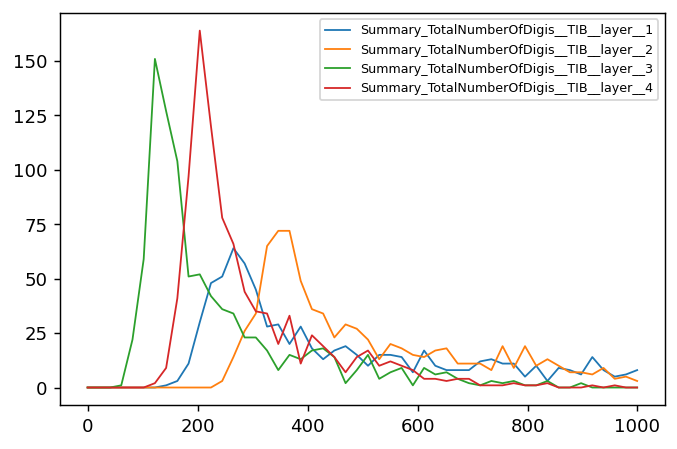

In [184]:
plt.figure(dpi=130)
for i,nbins,minval,maxval,title in zip(ar.data,ar.x_bin,ar.x_min,ar.x_max,ar.title):
    if 'tib' in title.lower() :
        plt.plot(np.linspace(minval,maxval,nbins),i,lw=1,label=title) 
plt.legend(fontsize=7)
# plt.yscale('log')
plt.show()

# Managing DQM Histogram Data Files

DQM data files are `.csv` files (`.root` support for nanoDQM files will be added in the future) which contain:
- Run Histograms or
- Lumisection 1D Histograms or
- Lumisection 2D Histograms

They are represented in DQM Playground's database with the `HistogramDataFile` model. 

By default, these files are expected to reside in `/eos/project/c/cmsml4dc`. This directory is not being monitored for changes, and new files can only be discovered using a [custom Django Management command](https://cmstrackerdpg.github.io/cms-tkdpg-software-knowledge-transfer/mlplayground/apps/histogram_file_manager/management/). 

The contents of a Histogram Data Files are unknown, until a user starts parsing the file by specifying three options:
- The `granularity` of the data (`run` or `lumisection`),
- The `data_dimensionality` of the data (`1` for 1D or `2` for 2D) and
- The file `file_format` (`csv` only available currently).

Depending on the combination of the three options above, DQM Playground will try to extract the appropriate histograms from the Histogram Data File, namely:

- `granularity=run`, `data_dimensionality=1` and `file_format=csv` will produce `RunHistogram`s,
- `granularity=lum`, `data_dimensionality=1` and `file_format=csv` will produce `LumisectionHistogram1D`s,
- `granularity=lum`, `data_dimensionality=2` and `file_format=csv` will produce `LumisectionHistogram2D`s.

## Listing all the available Histogram Data Files

To list all the Histogram Data Files that DQM Playground has discovered:

In [6]:
available_hdf = api_instance.list_histogram_data_files(page=1) # No filters supplied
print(f"Got {len(available_hdf.results)} Histogram Data Files")  # Keep in mind that results are returned in pages of 50

Got 50 Histogram Data Files


## Filtering histogram data files by filename
For this example, we will try to get the status of the `ZeroBias_2017B_DataFrame_2D_17.csv` DQM file.

In [58]:
available_hdf = api_instance.list_histogram_data_files(filepath__contains="ZeroBias_2017B_DataFrame_2D_17")
print(available_hdf.results)

[{'created': datetime.datetime(2022, 10, 7, 9, 53, 35, 808784, tzinfo=tzutc()),
 'data_dimensionality': None,
 'data_era': '',
 'entries_processed': 31550,
 'entries_total': 31550,
 'filepath': '/eos/project/c/cmsml4dc/ML_2020/UL2017_Data/DF2017B_2D_Complete/ZeroBias_2017B_DataFrame_2D_17.csv',
 'filesize': 2256.8446884155273,
 'granularity': None,
 'id': 175788,
 'lumisection_histograms_1d': 0,
 'lumisection_histograms_2d': 31550,
 'modified': datetime.datetime(2022, 12, 19, 17, 39, 23, 278535, tzinfo=tzutc()),
 'percentage_processed': '100.0',
 'run_histograms': 0}]


If parsing has already been started for this specific Histogram Data File, we will see the `data_dimensionality` and `granularity` values already set. If not, they will be unknown. 

Once parsing of the file has started, the total number of `run_histograms`, `lumisection_histograms_1d` or `lumisection_histograms_2d` that were extracted from this file will be available under the respective values in the response. 

Its parsing percentage can also be seen under the `percentage_processed` value.

## Starting parsing a Histogram Data File
To start parsing a Histogram Data file, we need:
- Its unique `id`,
- The `granularity` of the data contained (`run` or `lumisection`),
- The `data_dimensionality` of the data (`1` for 1D or `2` for 2D) and
- The file `file_format` (`csv`).

In [59]:
available_hdf = api_instance.list_histogram_data_files(filepath__contains="ZeroBias_2017B_DataFrame_2D_18")
file_id = available_hdf.results[0].id

# TODO: Buggy generated code by swagger creates multiple definitions for start_parsing_histogram_data_file
# body = {'granularity':'lum', 'data_dimensionality':2, 'file_format':'csv'}
# success = api_instance.start_parsing_histogram_data_file(id=file_id, body=body)

# Manually do the request for now
r = requests.post(
    f"https://ml4dqm-playground.web.cern.ch/api/histogram_data_files/{file_id}/start_parsing/",
    headers={"Content-Type": "application/json", "Authorization": f"Token {API_TOKEN}"},
    json={'granularity':'lum', 'data_dimensionality':2, 'file_format':'csv'}
)

In [60]:
dir(r)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [85]:
r.text

'"HistogramDataFile with pk 174538 is already parsed"'

In [62]:
print(f"Parsing for file {file_id} started: {r.ok}")

Parsing for file 174538 started: False


In [63]:
available_hdf

{'count': None,
 'next': None,
 'previous': None,
 'results': [{'created': datetime.datetime(2022, 4, 14, 15, 51, 32, 673477, tzinfo=tzutc()),
              'data_dimensionality': None,
              'data_era': '',
              'entries_processed': 31480,
              'entries_total': 31480,
              'filepath': '/eos/project/c/cmsml4dc/ML_2020/UL2017_Data/DF2017B_2D_Complete/ZeroBias_2017B_DataFrame_2D_18.csv',
              'filesize': 2292.8506717681885,
              'granularity': None,
              'id': 174538,
              'lumisection_histograms_1d': 0,
              'lumisection_histograms_2d': 31480,
              'modified': datetime.datetime(2022, 10, 7, 10, 54, 42, 587857, tzinfo=tzutc()),
              'percentage_processed': '100.0',
              'run_histograms': 0}]}

In [114]:
for i in range(129,140):
    temp = api_instance.list_histogram_data_files(page=i)
    print(i)
    if temp.next == None: print('No more pages'); break

129
130
131
132
133
134
135
136
137
No more pages


There are 137 pages with $\approx$ 50 files each

In [153]:
histo_files = api_instance.list_histogram_data_files(granularity='lum')

In [154]:
histo_files

{'count': None,
 'next': None,
 'previous': None,
 'results': [{'created': datetime.datetime(2022, 4, 14, 15, 51, 35, 12051, tzinfo=tzutc()),
              'data_dimensionality': None,
              'data_era': '',
              'entries_processed': 100000,
              'entries_total': 100000,
              'filepath': '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_10.csv',
              'filesize': 52.8610143661499,
              'granularity': None,
              'id': 175120,
              'lumisection_histograms_1d': 89550,
              'lumisection_histograms_2d': 0,
              'modified': datetime.datetime(2023, 2, 14, 15, 0, 42, 739541, tzinfo=tzutc()),
              'percentage_processed': '100.0',
              'run_histograms': 0},
             {'created': datetime.datetime(2022, 4, 14, 15, 51, 35, 15147, tzinfo=tzutc()),
              'data_dimensionality': None,
              'data_era': '',
              'entries_processe

In [155]:
pd.DataFrame.from_dict([r.to_dict() for r in histo_files.results]).filepath.tolist()

['/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_10.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_11.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_12.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_13.csv',
 '/eos/project/m/mlplayground/public/DQMIO/nanodqmio_example.root',
 '/eos/project/m/mlplayground/public/DQMIO/nanodqmio_example.root',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_1.csv']

In [1]:
!dasgoclient --help

/bin/bash: dasgoclient: command not found
